Looking at different calssification models

we have bniary classification and multiclassifcaition and multilabel classifcation models which we will see through out the in this colab sheet
[NN visulaisation](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.87157&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

create a data and fit (simple data)
before going into larger modles

In [2]:
from sklearn.datasets import make_circles #making toy samples datasets

In [3]:
n_samples = 1000 #make 100 examples

X,y = make_circles(n_samples,noise =0.03, random_state =42)

In [4]:
#check the features


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

so what is this X nad y so for this we will visualize

In [12]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:,0],'X1':X[:,1],'label':y})
circles #this is our data with

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


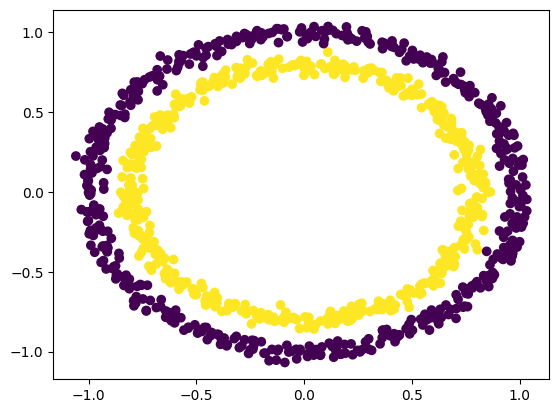

In [13]:
import matplotlib.pyplot as plt
plt.scatter(circles['X0'],circles['X1'],c=circles['label'])

In [ ]:
#input and output shape of our data what should be our input data nd y

#Steps  in classifcation Modellin with tensor flow

1) create or import the model

2) complie the modle

3)fit the model

4)evaluate

5)tweak the model

In [14]:
import tensorflow as tf
tf.random.set_seed=42

model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X,y,epochs =10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 6.3475 - accuracy: 0.4940
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


In [16]:
import tensorflow as tf # #but we can see that its only 50 % accuracy so we add another layer
tf.random.set_seed=42

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs =100,verbose=0)
###evaluate the model 2
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933233737945557, 0.5]

##Improve our MODEL

1) add more layer or increse the hidden units

2) different optimization function Adam

3) more epochs traing for more

In [19]:
tf.random.set_seed=42

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100), #adding more hiden unit
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),#changing the optimizer from Sgd to adam
                metrics=['accuracy'])

model_3.fit(X,y,epochs =100,verbose=0)
###evaluate the model 2
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4920


[0.6949350237846375, 0.492000013589859]

###make some prediction to understand our model

In [27]:
import numpy as np
def plot_decision_boundary(model,X,y):
    #Define the axis boundaries of the plot and create a meshgrid
    x_min , x_max = X[:,0].min() - 0.1 , X[:,0].max() +0.1
    y_min , y_max = X[:,1].min() - 0.1 , X[:,1].max() +0.1
    xx,yy =np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(x_min,x_max,100))
    x_in = np.c_[xx.ravel(),yy.ravel()]

    y_pred =model.predict(x_in)
#check for multiclass
    if len(y_pred[0])>1:

       print( 'doing multiclass classification')
       y_pred = np.argmax(y_pred,axis = 1).reshape(xx.shape)
    else:
        print('doin binary classifccation')
        y_pred = np.round(y_pred).reshape(xx.shape) #we have to reshape our predictions to get them eady for plotting
    #Plot the decision boundary
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha =0.7)
    plt.scatter(X[:,0],X[:,1], c= y, s= 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


[the function obtained from this link](https://cs231n.github.io/)

313/313 [==============================] - 1s 2ms/step
doin binary classifccation


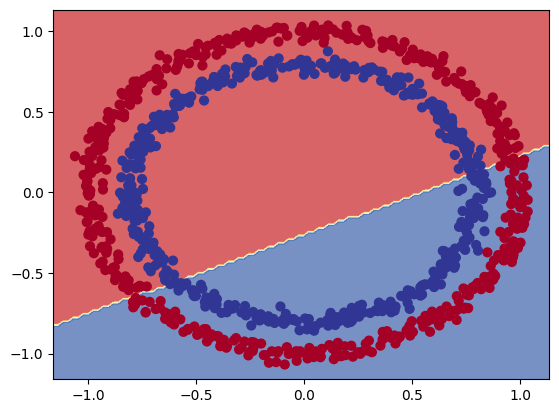

In [28]:
#ckecking the function
plot_decision_boundary(model_3,X=X,y=y)

In [37]:
#our model is predicting linearity but our data is non linear
tf.random.set_seed=42

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'), #adding activation function to indroduce non linearity #tf.keras.activation.relu
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1 )
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),#changing the optimizer from Sgd to adam
                metrics=['accuracy'])

model_4.fit(X,y,epochs =100,verbose=0)
###evaluate the model 2
history = model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000


313/313 [==============================] - 1s 2ms/step
doin binary classifccation


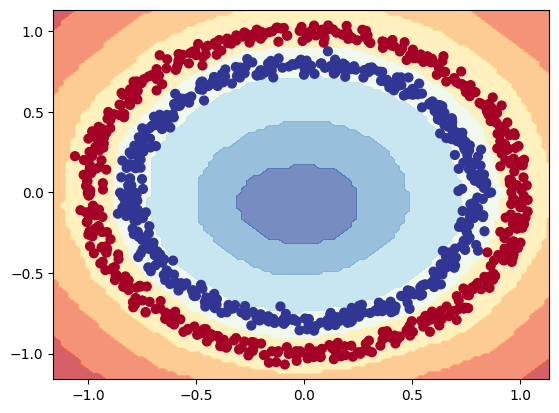

In [38]:
plot_decision_boundary(model_4,X=X,y=y)

In [39]:
#our model is predicting linearity but our data is non linear
tf.random.set_seed=42

model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'), #adding activation function to indroduce non linearity #tf.keras.activation.relu
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation = 'sigmoid' )# adding regularsation in output layer
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),#changing the optimizer from Sgd to adam
                metrics=['accuracy'])

model_5.fit(X,y,epochs =100,verbose=0)
###evaluate the model 2
history = model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000


313/313 [==============================] - 1s 3ms/step
doin binary classifccation


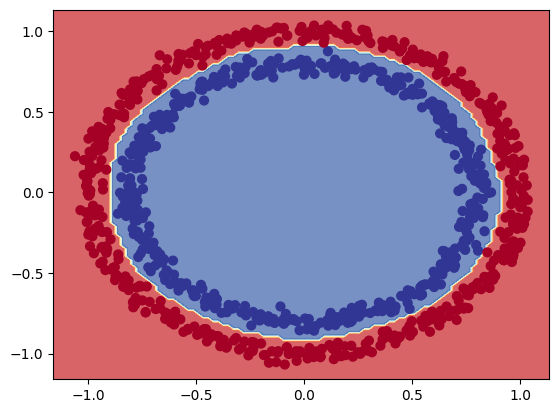

In [48]:
plot_decision_boundary(model_5,X=X,y=y)

'is this overfitting as we have trained on the same data and evaluate on the same data?

###Evaluating the model correctly and improving it



In [49]:

# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [65]:
tf.random.set_seed=42

model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'), #adding activation function to indroduce non linearity #tf.keras.activation.relu
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1,activation = 'sigmoid' )# adding regularsation in output layer
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),#changing the optimizer from Sgd to adam
                metrics=['accuracy'])

history_1 =model_5.fit(X_train,y_train,epochs =100,verbose=0)
###evaluate the model 2
model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000


[0.008110305294394493, 1.0]

313/313 [==============================] - 1s 2ms/step
doin binary classifccation
313/313 [==============================] - 0s 1ms/step
doin binary classifccation


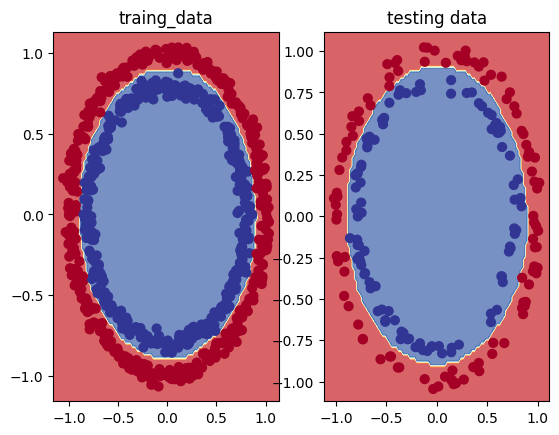

In [59]:
plt.subplot(1,2,1)
plt.title('traing_data')
plot_decision_boundary(model_5, X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('testing data')
plot_decision_boundary(model_5, X=X_test,y=y_test)
plt.show()

###Plot the loss curve

Text(0.5, 0, 'epochs')

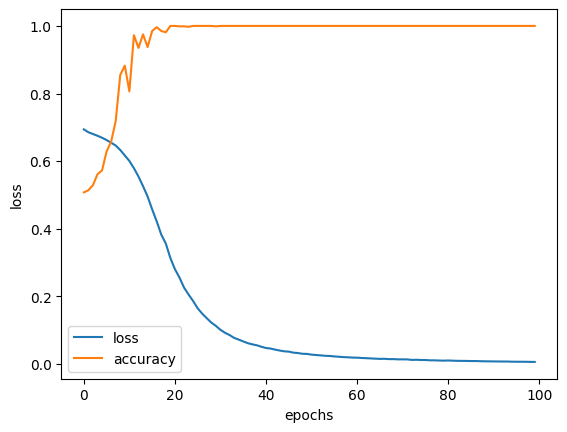

In [67]:
pd.DataFrame(history_1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

##to identify the learning rate

how can we do that

1) callback _

2)another model

3)a mdofied curve plot

In [86]:
tf.random.set_seed=42 #' setting a call back'

model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'), #adding activation function to indroduce non linearity #tf.keras.activation.relu
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid' )# adding activation in output layer
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer='Adam',#changing the optimizer from Sgd to adam
                metrics=['accuracy'])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))#introducing a callbak

history_2 =model_6.fit(X_train,y_train,epochs =100,callbacks=[lr_schedular],verbose=0)
###evaluate the model 2
# model_5.evaluate(X_test,y_test)

<Axes: xlabel='epoch'>

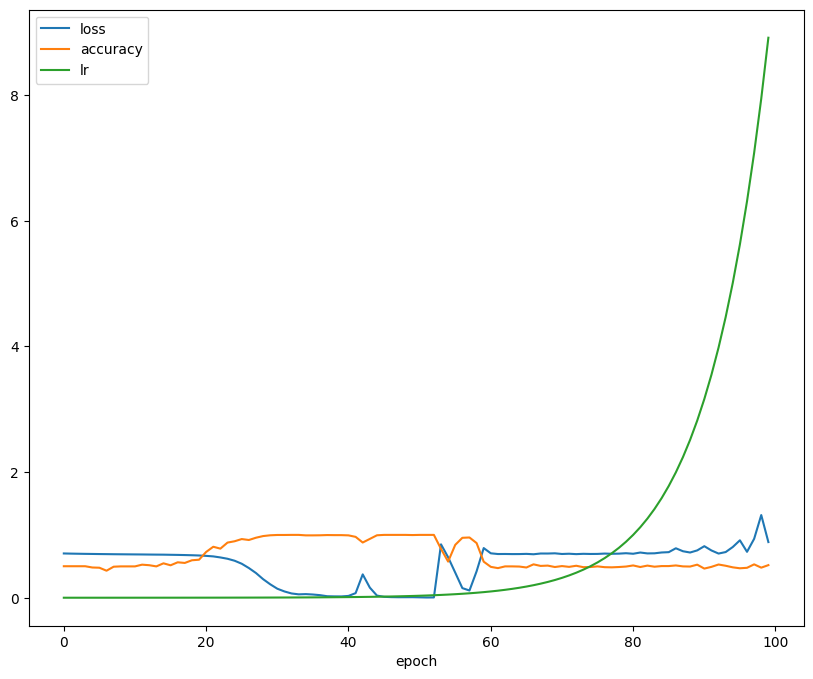

In [87]:
pd.DataFrame(history_2.history).plot(figsize=(10,8),xlabel = 'epoch')

Text(0.5, 1.0, 'lr vs loss')

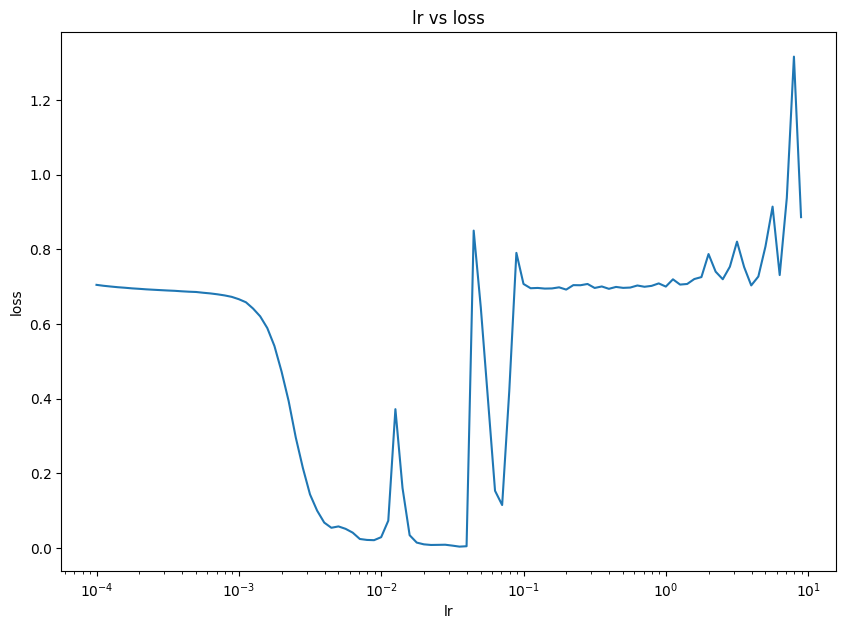

In [88]:
#plot the learing rate versus losss
lrs = 1e-4*10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_2.history['loss'])
plt.xlabel('lr')
plt.ylabel('loss')
plt.title('lr vs loss')

###traing with ideal  learning rate

In [90]:
tf.random.set_seed=42 #training with the ideal rate

model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'), #adding activation function to indroduce non linearity #tf.keras.activation.relu
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid' )# adding activation in output layer
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(0.004),#changing the optimizer from Sgd to adam
                metrics=['accuracy'])

#lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))#introducing a callbak

history_3 =model_7.fit(X_train,y_train,epochs =15)

Epoch 1/15
25/25 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5125
Epoch 2/15
25/25 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.5850
Epoch 3/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6486 - accuracy: 0.6313
Epoch 4/15
25/25 [==============================] - 0s 3ms/step - loss: 0.6073 - accuracy: 0.7663
Epoch 5/15
25/25 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.9275
Epoch 6/15
25/25 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.9287
Epoch 7/15
25/25 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.9712
Epoch 8/15
25/25 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9937
Epoch 9/15
25/25 [==============================] - 0s 3ms/step - loss: 0.1487 - accuracy: 0.9975
Epoch 10/15
25/25 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9975
Epoch 11/15
25/25 [

In [91]:
#evalute model_7
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 1.0000


[0.029852813109755516, 1.0]

313/313 [==============================] - 1s 2ms/step
doin binary classifccation
313/313 [==============================] - 1s 2ms/step
doin binary classifccation


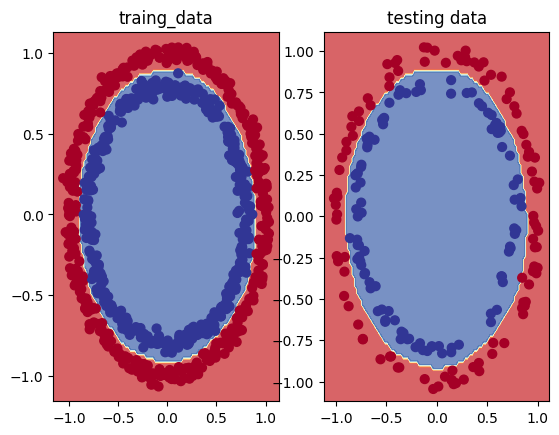

In [92]:
plt.subplot(1,2,1)
plt.title('traing_data')
plot_decision_boundary(model_7, X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('testing data')
plot_decision_boundary(model_7, X=X_test,y=y_test)
plt.show()

##Evalution methods for classifcation (advance)


In [93]:
loss ,accurycy = model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 1.0000


In [99]:
from sklearn.metrics import confusion_matrix
y_preds =model_7.predict(X_test)
y_preds = tf.round(y_preds)
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 4ms/step


array([[101,   0],
       [  0,  99]])

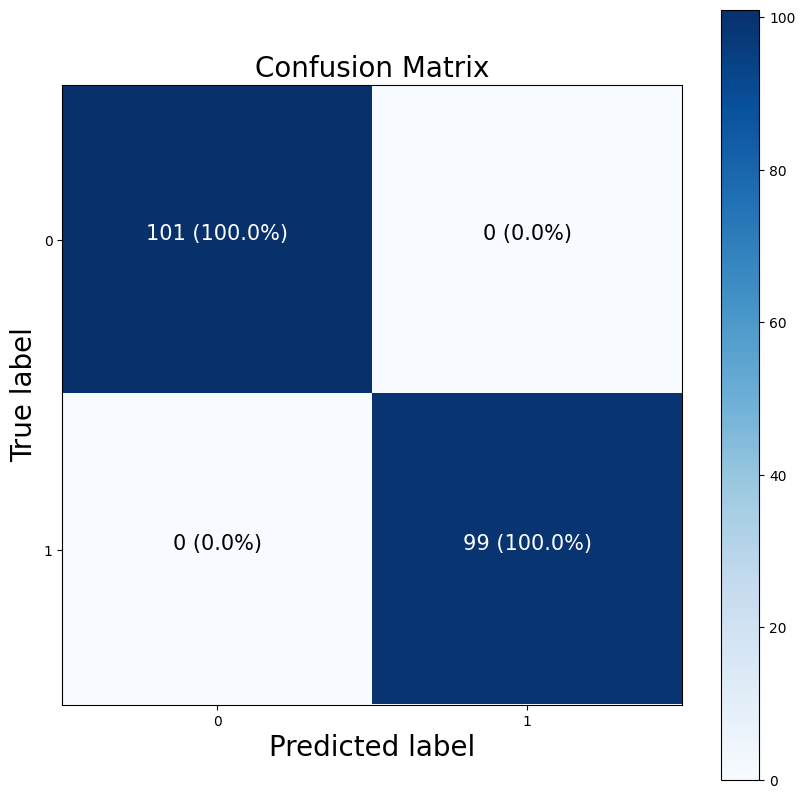

In [100]:
#make confusion matrix beautiful
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

<Axes: >

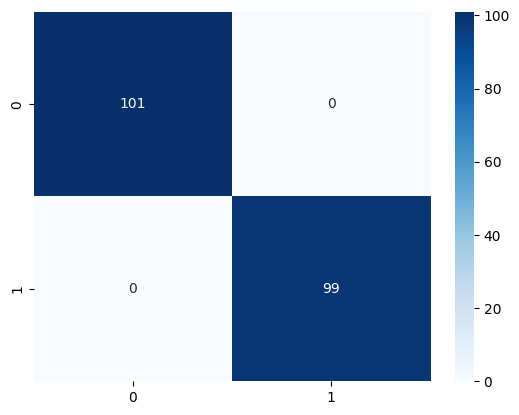

In [101]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(n_classes), yticklabels=np.arange(n_classes))


# Moving to multiclass classification

In [107]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [109]:
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [113]:
train_data.shape, train_labels.shape, test_data.shape,test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

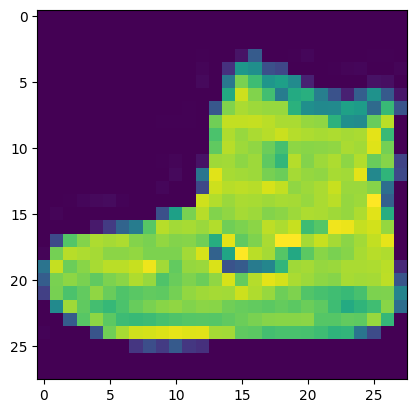

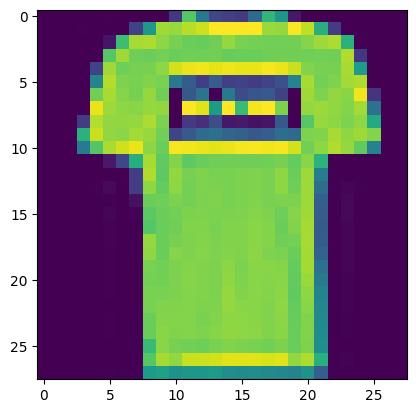

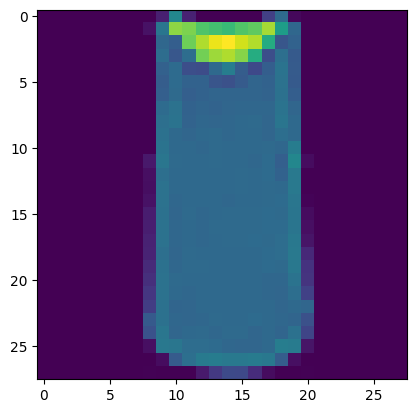

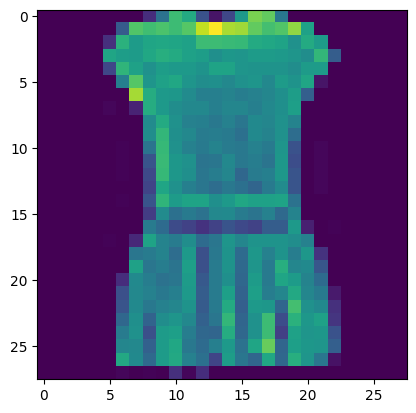

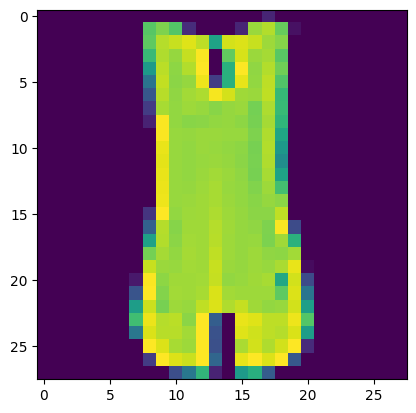

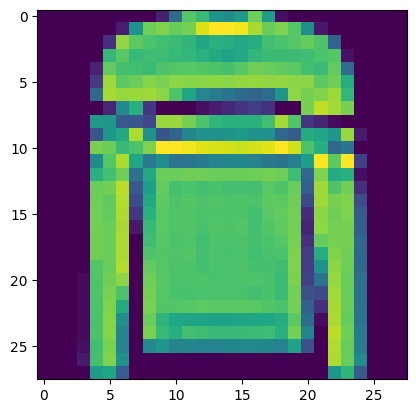

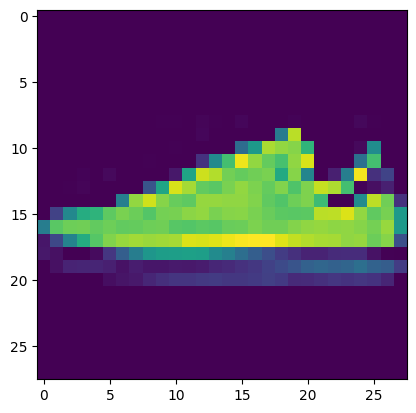

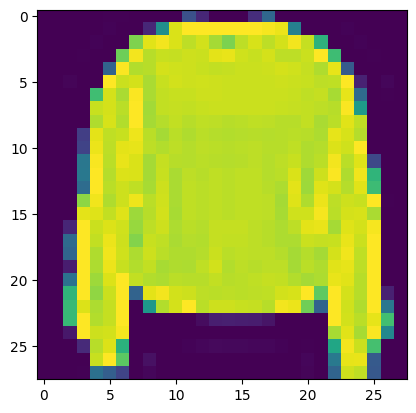

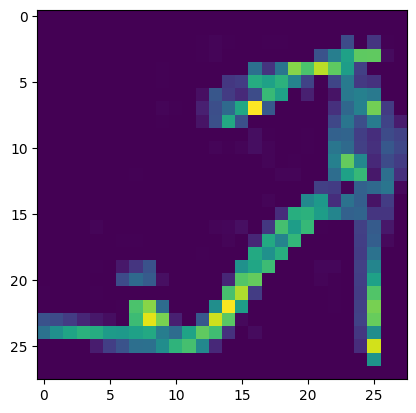

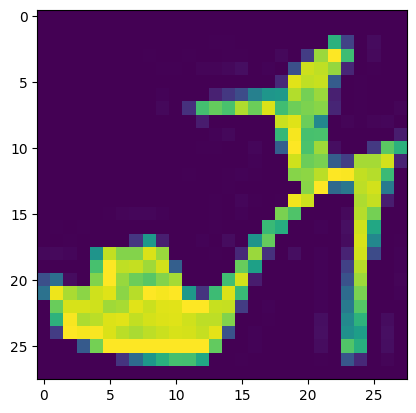

In [118]:
import matplotlib.pyplot as plt
for i in range(0,10):

  plt.imshow(train_data[i])
  plt.show()

In [119]:
train_labels[7] #It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

2

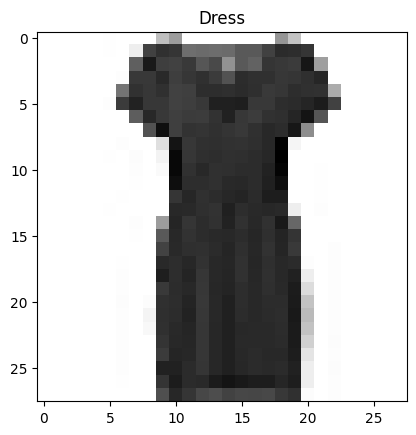

In [120]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot an example image and its label
plt.imshow(train_data[20], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[20]]);

##Train the Model muticlass bulid the model


we are going to tweak some the things in muticlass comüared to binary
classification_report
1 input shape = 28 *28 (the shape of one image)

output shape = 10 (one per class as in this problem we have 10 different
classes)
loss function =tf.keras.lösses.categorical_crossentropy

in output layer use softmax function

In [122]:
train_data[0].shape

(60000, 28, 28)

We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().

In [126]:
tf.random.set_seed=42

model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(100,activation='relu'), #adding activation function to indroduce non linearity #tf.keras.activation.relu
    tf.keras.layers.Dense(10,activation = 'relu'),
    tf.keras.layers.Dense(10,activation = 'softmax' )# adding regularsation in output layer adding 10 nueron as we have 10 classes and also adding softmax as it it a multiclass
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),#ables are integer use SparseCtaegricalcrossentropy
                optimizer=tf.keras.optimizers.Adam(),#changing the optimizer from Sgd to adam
                metrics=['accuracy'])

history_1 =model_1.fit(train_data,train_labels,epochs =10,validation_data=(test_data,test_labels))
###evaluate the model 2
#model_1.evaluate(test_data,test_labels)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2783 - accuracy: 0.1650 - val_loss: 2.2939 - val_accuracy: 0.1016
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2534 - accuracy: 0.1254 - val_loss: 2.3491 - val_accuracy: 0.1120
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2464 - accuracy: 0.1296 - val_loss: 2.2069 - val_accuracy: 0.1394
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1458 - accuracy: 0.1583 - val_loss: 1.8561 - val_accuracy: 0.2172
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7949 - accuracy: 0.2460 - val_loss: 1.7059 - val_accuracy: 0.2499
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6878 - accuracy: 0.2876 - val_loss: 1.7644 - val_accuracy: 0.2259
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6606 - accuracy: 0.3009 - val_loss: 1.5938 - val_accuracy:

Nerual Netwoks prefer normalisation or scaling ie is getting the data between 0 and 1



In [127]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [129]:

# Set random seed
tf.random.set_seed= 42

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3702 - accuracy: 0.4683 - val_loss: 0.9547 - val_accuracy: 0.6474
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8380 - accuracy: 0.6958 - val_loss: 0.8102 - val_accuracy: 0.7019
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7518 - accuracy: 0.7256 - val_loss: 0.7565 - val_accuracy: 0.7317
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6937 - accuracy: 0.7533 - val_loss: 0.7045 - val_accuracy: 0.7557
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6627 - accuracy: 0.7611 - val_loss: 0.6811 - val_accuracy: 0.7539
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6456 - accuracy: 0.7664 - val_loss: 0.6725 - val_accuracy: 0.7583
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6346 - accuracy: 0.7700 - val_loss: 0.6688 - val_accuracy:

<Axes: title={'center': 'normalised data'}>

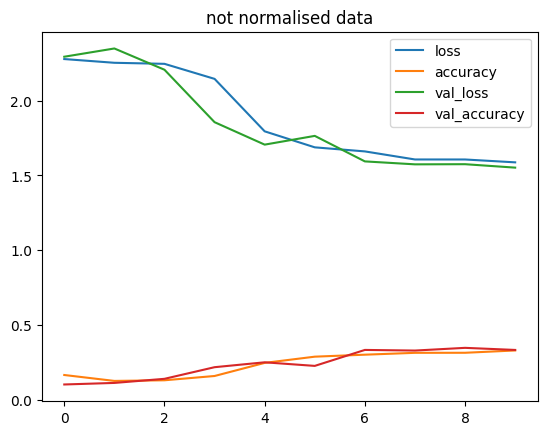

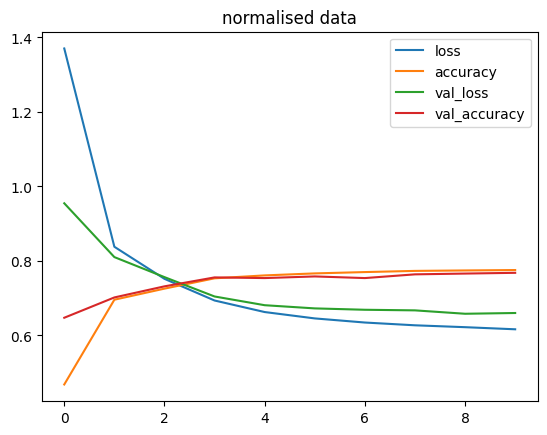

In [130]:
import pandas as pd
pd.DataFrame(history_1.history).plot(title= 'not normalised data')
pd.DataFrame(norm_history.history).plot(title= 'normalised data')


### Finidng the ideal learning rate



In [131]:
# Set random seed
tf.random.set_seed= 42

model_13 = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
tf.keras.layers.Dense(4, activation="relu"),
tf.keras.layers.Dense(4, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8796 - accuracy: 0.2581 - val_loss: 1.3954 - val_accuracy: 0.4390 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2525 - accuracy: 0.4865 - val_loss: 1.0387 - val_accuracy: 0.5402 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8852 - accuracy: 0.6458 - val_loss: 0.8185 - val_accuracy: 0.6763 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7585 - accuracy: 0.7260 - val_loss: 0.7513 - val_accuracy: 0.7394 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7056 - accuracy: 0.7548 - val_loss: 0.7349 - val_accuracy: 0.7513 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6815 - accuracy: 0.7639 - val_loss: 0.6925 - val_accuracy: 0.7652 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

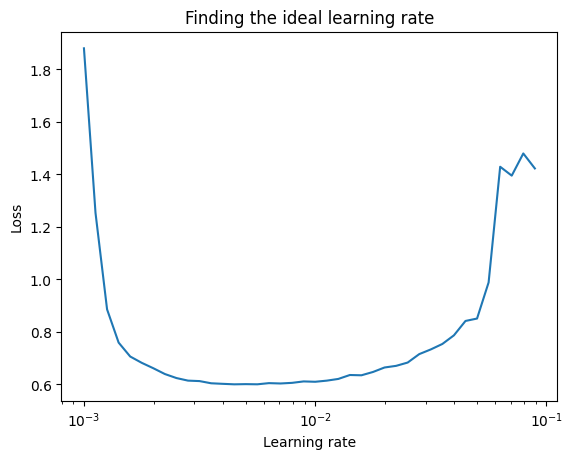

In [132]:

# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [134]:
tf.random.set_seed=42

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1351 - accuracy: 0.5768 - val_loss: 0.8495 - val_accuracy: 0.7070
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7799 - accuracy: 0.7236 - val_loss: 0.7706 - val_accuracy: 0.7442
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7174 - accuracy: 0.7483 - val_loss: 0.7310 - val_accuracy: 0.7544
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6823 - accuracy: 0.7608 - val_loss: 0.7045 - val_accuracy: 0.7530
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6620 - accuracy: 0.7670 - val_loss: 0.6752 - val_accuracy: 0.7639
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6482 - accuracy: 0.7721 - val_loss: 0.6705 - val_accuracy: 0.7654
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6365 - accuracy: 0.7738 - val_loss: 0.6731 - val_accuracy:

##Evalution of multiclass by

313/313 [==============================] - 1s 3ms/step


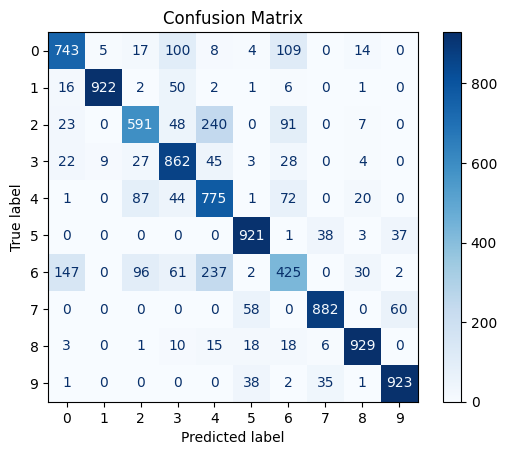

In [141]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test data
test_predictions = model_14.predict(test_data)
predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Create a ConfusionMatrixDisplay object for visualization
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

# Display the confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


#how is our model leanring pattern


In [142]:

# Find the layers of our most recent model
model_14.layers

In [143]:

# Extract a particular layer
model_14.layers[1]

In [144]:

# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.31582215, -0.8955613 ,  0.7945254 , -0.40959468],
        [-0.01308838, -0.11415164,  0.09017849, -1.0763134 ],
        [-0.5302149 , -0.4163224 ,  0.91668963, -0.7829299 ],
        ...,
        [-0.2844613 , -1.4080237 ,  0.29349753, -0.14249973],
        [ 0.10711884, -0.5081177 , -0.08760837, -0.4927828 ],
        [-0.7821727 , -0.7486146 ,  1.0372378 ,  0.08266009]],
       dtype=float32),
 (784, 4))

In [145]:

# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 1.1033506 , -0.6948668 ,  1.5777333 ,  0.38438123], dtype=float32),
 (4,))

In [146]:

# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 4)                 3140      
                                                                 
 dense_77 (Dense)            (None, 4)                 20        
                                                                 
 dense_78 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


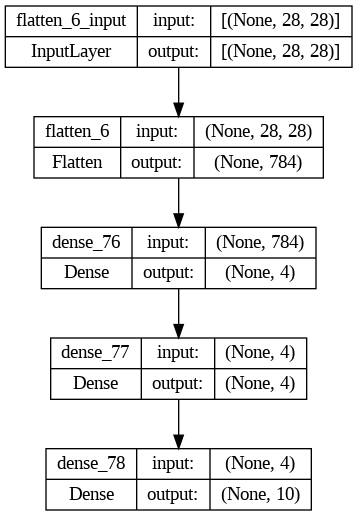

In [147]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)